# Recurrent Neural Network

In [1]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as pl
import random
%matplotlib inline

In [2]:
# Generate the data
xmin = 0
xmax = 6.28
num_points = 100

# Generate 2Hz + 3Hz noise-free sine wave
data = np.sin(2*np.linspace(xmin,xmax,num_points)) + np.sin(3*np.linspace(xmin,xmax,num_points))

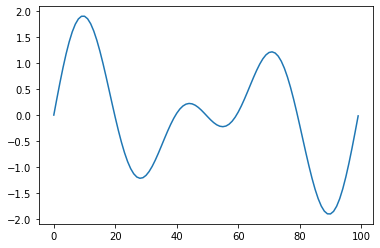

In [3]:
_ = pl.plot(data)

In [4]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))


def compute_error(pred, real):
    loss = 0.5*(pred - real)**2
    return loss

In [5]:
class simpleRNN:
    def __init__(self):
        neurons = 100# TODO Try different values
        ip_dim = 1 # Input dimension
        op_dim = 1 # Output dimension
        self.lr = 0.005 # Learning rata TODO Try different values

        self.U = np.ones([ip_dim, neurons])
        self.W = np.random.randn(neurons, neurons)
        self.V = np.random.randn(neurons, op_dim)
        self.h = np.zeros((1,neurons))

        
    def feedforward(self, x):
        for t in range(x.size):      
            new_input = np.zeros(x.shape) 
            new_input[t] = x[t]
            mul_u = np.dot(self.U.T, new_input[t])
            mul_w = np.dot(self.W, self.h.T)
            #mul_w = 0 # Setting recurrent weight w to 0
            add = mul_w + mul_u
            h = sigmoid(add)
            mul_v = np.dot(self.h, self.V)
            self.h = h.T   
            self.yhat = mul_v
        return self.yhat
        
    def backprop(self, y):
        d_mul_v = (self.yhat - y)
        d_l = d_mul_v*self.h   
        self.V = self.V - self.lr*d_l.T

    def compute_loss(self, y):
        loss = compute_error(self.yhat, y)
        #print('Error :', loss)
        return loss
    
model = simpleRNN()

In [6]:
iterations = 10000 # TODO Try different values 
minibatch_size = 25 # TODO Try different values
loss = np.zeros((iterations,1))
for i in range(iterations):
    data_noise = data + np.random.normal(0, 0.1, num_points) # TODO add some noise at every trial 
    start_time = random.randint(0, num_points-minibatch_size-2) # extra -1 for the prediction step
    model.feedforward(data_noise[start_time:start_time+minibatch_size])
    model.backprop(data_noise[start_time+minibatch_size+1])
    loss[i] = model.compute_loss(data_noise[start_time+minibatch_size+1])

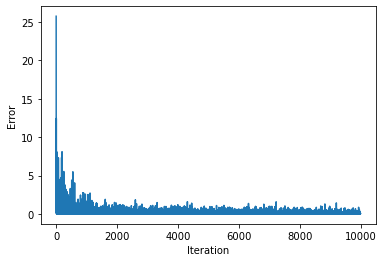

In [7]:
pl.plot(loss)
_ = pl.xlabel('Iteration')
_ = pl.ylabel('Error')

In [8]:
y = np.zeros((len(data)-minibatch_size-2,1))
for start_time in range(len(data)-minibatch_size-2):
    data_noise = data + np.random.normal(0, 0.1, num_points) # TODO add some noise at every trial 
    y[start_time] = model.feedforward(data_noise[start_time:start_time+minibatch_size])

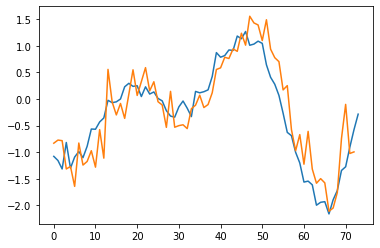

In [9]:
_ = pl.plot(data_noise[minibatch_size:len(data)-1])
_ = pl.plot(y)

# Report

Note - The plots shown below would not necessasarily be the exactly the same everytime we run the code using those parameter values as the 'start_time' is a random value in a range, which then picks a random subset of the available data to train on. However, a reasonably similar plot is expected.

# 1. Result without adding noise to the data

Parameters sets:
neurons = 100,
lr = 0.005,
iterations = 10000,
minibatch_size = 25

Plot of Iterations vs Error
<img src="Screenshots/wihtout_noise_loss.png">

We can notice that the error decereases and converges to a value after few iterations.
<img src="Screenshots/wihtout_noise_predictions.png">

The plot of predicted values follows the same upward and downward trend of the actual values with few incorrect hops.


### Decreasing the learning rate
Parameters sets:
neurons = 100,
lr = 0.001,
iterations = 10000,
minibatch_size = 25

Plot of Iterations vs Error
<img src="Screenshots/wihtout_noise_loss_lr.png">

We can notice that the error decereases and converges to a value after few iterations. However, the error slightly increases from the previous case.
<img src="Screenshots/wihtout_noise_predictions_lr.png">

We notice that the predicted values of the sine wave have sharp turns. Thought the predicted plot follow similar pattern to the actual values, the predicted values are reasonably mostly far away from the actual values.

### Increase minibatch_size and decreasing iterations
Parameters sets:
neurons = 100,
lr = 0.005,
iterations = 5000,
minibatch_size = 35

Plot of Iterations vs Error
<img src="Screenshots/wihtout_noise_loss_iter_batch.png">

We can notice that the error decreases when we increase decrease the number of iterations and increase the minibatch_size, but the error after 5000 iterations is more than in previous cases.
<img src="Screenshots/wihtout_noise_predictions_iter_batch.png">

From the plot, we see that the predicted values are not close to the actual values.

### Increasing the neurons
Parameters sets:
neurons = 200,
lr = 0.001,
iterations = 10000,
minibatch_size = 25

Plot of Iterations vs Error
<img src="Screenshots/wihtout_noise_loss_neurons.png">

We can notice that the error keeps increasing when we increase the number of neurons to 200.
<img src="Screenshots/wihtout_noise_predictions_neurons.png">

From the above plot, we see the predicted values are very sharp and inaccurate to the actual values.

# 2. Results with adding noise to the data

Parameters sets:
neurons = 100,
lr = 0.005,
iterations = 10000,
minibatch_size = 25

Plot of Iterations vs Error
<img src="Screenshots/with_noise_loss.png">

We can notice that the error decereases and converges to a value after few iterations.
<img src="Screenshots/with_noise_predictions.png">

As we can notice, data with noise took more iterations to converge the loss to a minimum value. Then, the predicted plots also has sharper edges while without noise the predicted plot graph was smooth without sharp turns. The predicted plot still follows a similar trend to the actual values.

### Increasing the learning rate
Parameters sets:
neurons = 100,
lr = 0.01,
iterations = 10000,
minibatch_size = 25

Plot of Iterations vs Error
<img src="Screenshots/with_noise_loss_lr.png">

We can notice that the error decereases and converges to a value after few iterations.
<img src="Screenshots/with_noise_predictions_lr.png">

As we can see from the above plot, increasing the learning rate brings the predicted values closer to the actual values. The predicted plot is much closer to the actual values as compared to the predictions produced with lesser learning rate.

### Decreasing minibatch_size and increasing iterations
Parameters sets:
neurons = 100,
lr = 0.005,
iterations = 15000,
minibatch_size = 15

Plot of Iterations vs Error
<img src="Screenshots/with_noise_loss_iter_batch.png">

We can notice that the loss does not converge to a value. The loss also is more than the previous cases.

<img src="Screenshots/with_noise_predictions_iter_batch.png">

As we can see that the predictions almost follow a similar trend to the actual values. There predicted plot gets a massive noise in certain regions of the plots where the predicted values are far away from the actual ones. Nevertheless, the overall plot follows the actual values closely.

### Decreasing the neurons
Parameters sets:
neurons = 50,
lr = 0.005,
iterations = 10000,
minibatch_size = 25

Plot of Iterations vs Error
<img src="Screenshots/with_noise_loss_neurons.png">

We can notice that the error decereases and converges to a value after few iterations. However, the error is comparatively more than the initially set parameters.
<img src="Screenshots/with_noise_predictions_neurons1.png">

The predicted values follow the actual values closely. With some sharp turns in the plot, the predicted values are quite close to the actual ones.

# Measures to improve the results of the RNN netwrok

1. We might use an adaptive learning rate as they can handle the complex training dynamics of recurrent networks as compared to plain gradient descent. Most common adaptive learning rate optimizer that is used is Adam optimizer.
2. We could normalise te loss, as normalising loss get losses to similar magnitude over datasets. The loss should be averaged across the batch.
3. We could use gradient clipping to plot the gradient to see its usual range and then scale down gradient that exceeds this range, to prevent spikes in gradients to alter the parameters too much during training.
4. Decreasing the number of neurons and using a comparatively higher learning rate helps in obtaining better results.
5. Reducing the minibatch_size tends to produce inferior results, and hence, using a reasonably high minibatch_size might generate better results.

# 3. Setting recurrent weight W to 0

Parameters sets:
neurons = 100,
lr = 0.005,
iterations = 10000,
minibatch_size = 25

Plot of Iterations vs Error
<img src="Screenshots/W0_loss.png">

From the above plot, we can see that the error converges quickly to a value and stays almost the same as the iterations increases.

We can notice that the error decereases and converges to a value after few iterations.
<img src="Screenshots/W0_predictions.png">

We can notice that the predicted values of the sine wave produces an almost linear graph. And even those the predicted values are almost linear, they still show to follow the rise and fall patterns of the actual values. Hence, when we set the trainable weights to 0, we get incorrect predictions.